# Уравнение Кеплера
Уравнение Кеплера для вычисления орбиты имеет вид
𝑀=𝐸−𝜀sin𝐸,

где  𝑀  – средняя аномалия,  𝐸  – эксцентрическая аномалия,  𝜀  – эксцентриситет орбиты. Пусть  𝑀=24.851090 ,  𝜀=0.1. 

Для примера возьмем планету Марс, т.к. примерно равные эксцентриситеты(используется только для простоения орбиты).

1) Построим орбиту, используя метод последовательных приближений найдем E.

2) Найдем E, используя `scipy.optimize.brentq`.

3)  Вычислим $E$ с помощью формулы
    $$
      E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
    $$
    где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
    Найдем $E$ по предыдущей формуле, используя равенство
    $$
      J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
    $$

# Вывод уравнения Кеплера
sqrt(1-e^2)

окружность. Здесь e — эксцентриситет.

Площадь эллипса равна

S=pi*a^2*sqrt(1-e^2)

где a — большая полуось.
Согласно второму закону Кеплера, который гласит, что площадь, заметаемая радиус-вектором небесного тела пропорциональна времени, можно написать

S(t)=pi*a^2*sqrt(1-e^2)*(t-t0)/T

где T — период обращения, t — текущее время, t0 — момент времени прохождения перигелия (ближайшей к Солнцу точки орбиты).

Найдем теперь зависимость этой площади от положения небесного тела на орбите, то есть от величины радиус-вектора r и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию E.
Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром).
Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.

/*Ссылка на изображение(Яндекс диск), непонятно почему, но на гите не отображается картинка, хоть в питоне все и нормально.*/

https://yadi.sk/i/L3Xc2pTY709nDg

Абсцисса небесного тела в точке P будет равна

x=cos(E)-a*e

ордината будет, соответственно, равна

y=a*sin(E)*sqrt(1-e^2)

Таким образом, получаем

x=r*cos(v)=a*cos(E)-e

y=r*sin(v)=a*sin(E)*sqrt(1-e^2)

Для вычисления площади S рассмотрим вспомогательные фигуры:
сектор окружности P'-O-Per:

S1=a^2*E/2

Сектор эллипса P-O-Per:

S2=S1*sqrt(1-e^2)

Треугольник O-O'-P:

S3=1/2*(y*a*e)=1/2*a^2*e*sinE*sqrt(1-e^2)

Сектор P-O'-Per:

S=S2-S3

Отсюда, прощадь S равна:

S(t)=1/2*a^2*sqrt(1-e^2)*(E-e*sin(E))

Сравнивая это выражение с выведенным ранее из второго закона Кеплера,
получаем:

M(t)=E(t)-e*sin(E(t))

где M(t)=2*pi*t/T

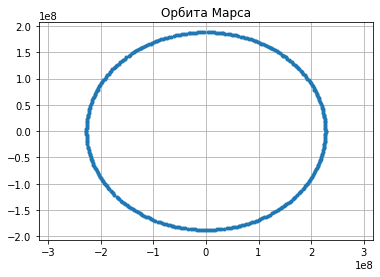

In [12]:
from numpy import*
from matplotlib.pyplot import*
%matplotlib inline
M=24.85109
e=0.1
a=149600000*1.52
N=360
def X(E):
    return a*cos(E)-e
def Y(E):
    return a*sin(E)*sqrt(1-e**0.5)
E=[i for i in arange(0,N,1)]
X=array([X(w) for w in E])
Y=array([Y(w) for w in E])
figure()
title("Орбита Марса")
axis('equal')
plot (X, Y, ".")
grid(True)
pass

# Вычислим E методом последовательных приближений:

$
M=E-e*sin(E)
$

$
Е = М + e*sin E
$

В правую часть уравнения вместо Е подставляется М и находится

$
Е1 = М + e sin М
$

Затем в правую часть уравнения вместо Е подставляется Е1 и находится Е2 и так далее

$
Е(k+1)= М + e*sin Ek
$

In [59]:
from math import*
from numpy import*
e=0.1
M=24.85109
E=M+e*sin(M)
a=1
while a<100: #При увеличении/уменьшении a от 5 до oo значение не изменится(ряд очень быстро сходится)
    Ek=M+e*sin(E)
    E=Ek
    Ek=0
    a=a+1
print(E)

24.820357182542907


# Вычислим E при помощи `scipy.optimize.brentq`:

In [60]:
from scipy import optimize
from math import*
from numpy import*
𝑀=24.851090
e=0.1
def f(E):
    return E-e*sin(E)-M
k=optimize.brentq(f,-40,40)
print(k)

24.820357182542907


# Вычислим E с помощью формулы
 
 $$
 E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
 $$
           где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
 $$
 J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
 $$
    



In [57]:
import sympy
from scipy import special
from math import*
sympy.init_session()
e=0.1
M=24.85109
def bessel(m,e):
    return Sum(((-1)**n * (m*e/2)**(2*n+m))/(factorial(n)*factorial(m+n)),[n,0,oo])
def E(M):
    return M+2*Sum((1/m)*bessel(m,e)*sin(m*M),[m,1,oo])
print(E(M).evalf())

IPython console for SymPy 1.4 (Python 3.7.4-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/

24.8203571859165


# Выводы
1) Все 3 способа дали практически идентичный результат(погрешность = 10^(-9)), 2 первых способа дали идентичный результат

2) Как и ожидалось самый долгий способ - нахождение эксцентрической аномалии с помощью формулы:
    $$
      E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
    $$
    где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
    $$
      J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
    $$
2 первых способа работают с примерно одинаковым быстродействием.